In [1]:
# Import Meteostat library and dependencies
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Point, Daily, Hourly

In [2]:
# Fungsi untuk meminta input dari pengguna untuk rentang waktu
def get_date_input(prompt):
    return datetime.strptime(input(prompt), "%Y-%m-%d")

# Input dari pengguna untuk menentukan start dan end datetime
start = get_date_input("Masukkan tanggal mulai (YYYY-MM-DD): ")
end = get_date_input("Masukkan tanggal akhir (YYYY-MM-DD): ")

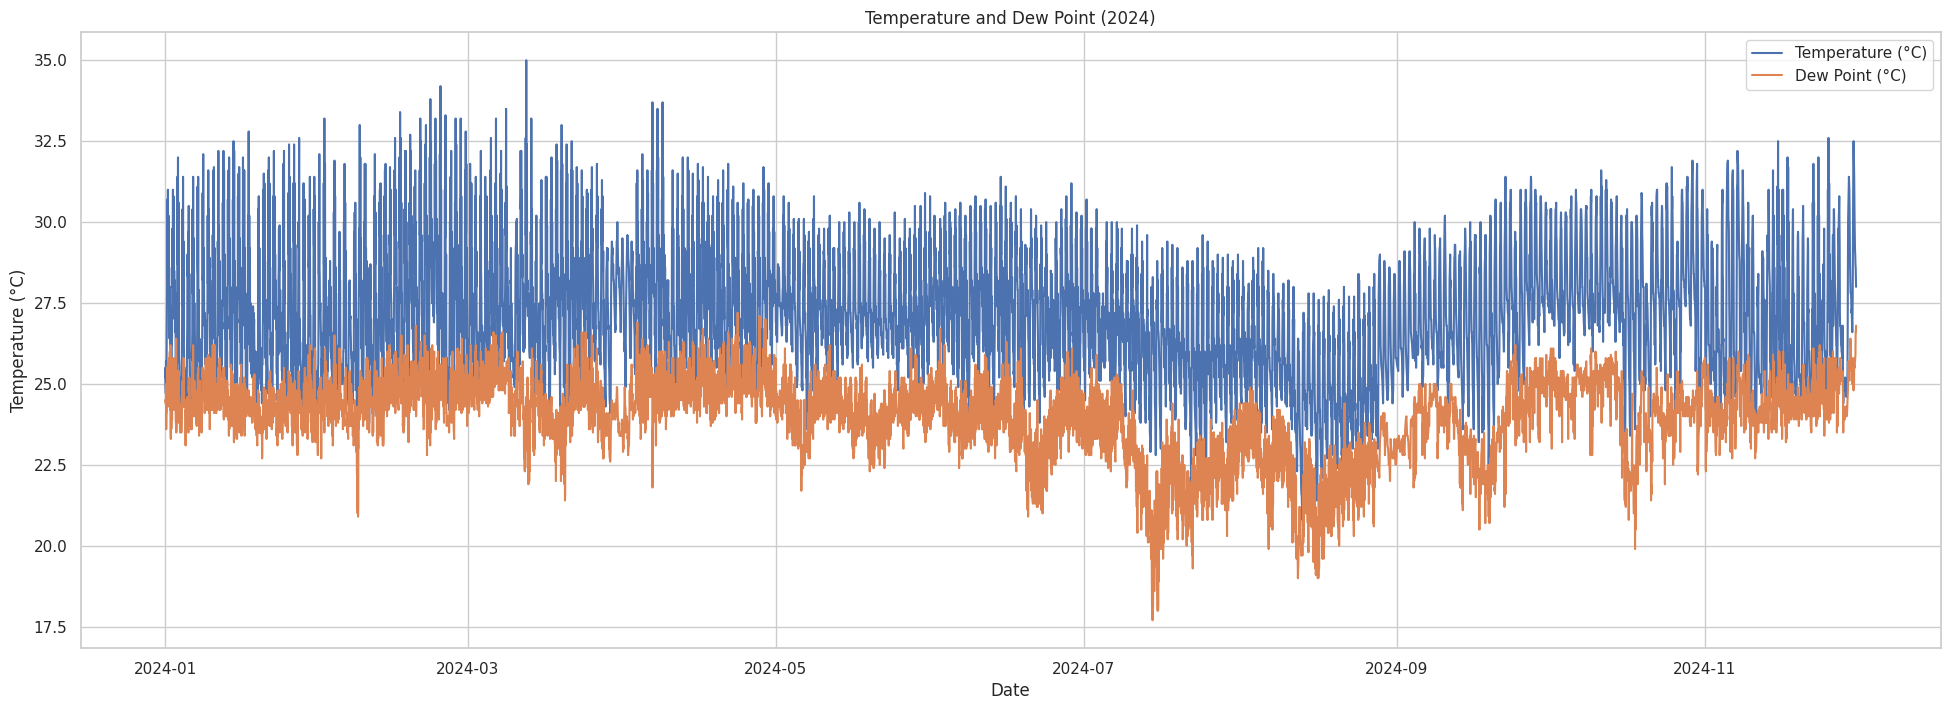

In [3]:
# Set seaborn theme
sns.set(style="whitegrid")

# Set time period
#start = datetime(2024, 9, 1)
#end = datetime(2024, 9, 30)

# Get hourly data
data = Hourly(96805, start, end,"Asia/Jakarta")
data = data.fetch()

# Plot line chart with custom figure size
plt.figure(figsize=(24, 8))

# Plot temperature and dew point with labels
plt.plot(data.index, data['temp'], label='Temperature (°C)')
plt.plot(data.index, data['dwpt'], label='Dew Point (°C)')

# Show the plot with seaborn styling
plt.title('Temperature and Dew Point (2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()  # Menambahkan legenda untuk penjelasan garis
plt.show()

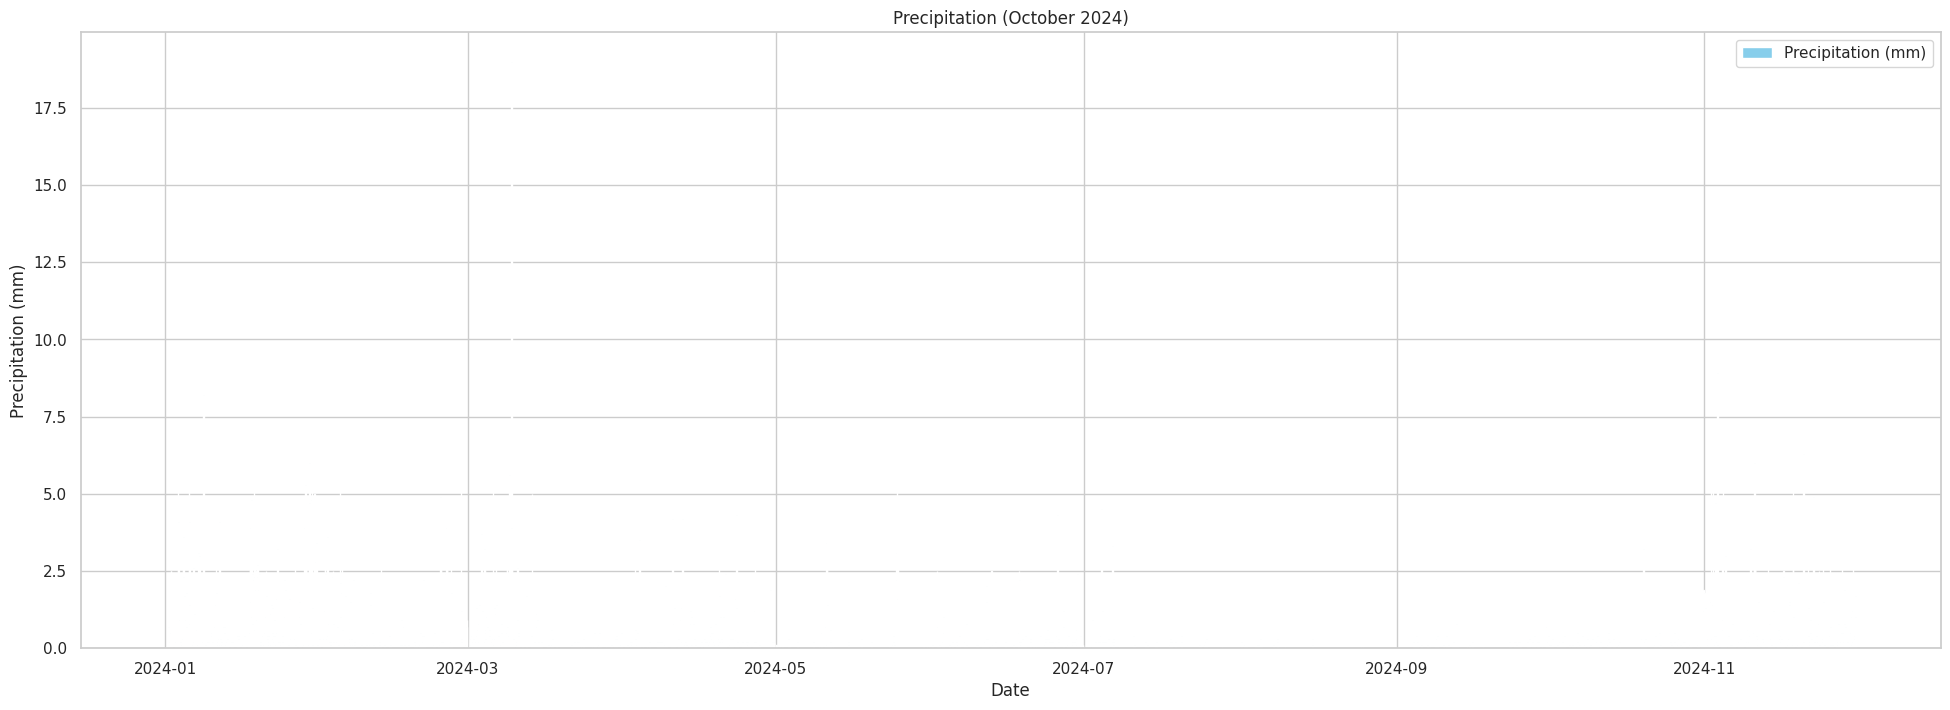

In [4]:
# Set seaborn theme
sns.set(style="whitegrid")

# Atur ukuran figure yang lebih besar
plt.figure(figsize=(24, 8))

# Plot precipitation menggunakan bar chart dengan lebar yang lebih kecil
plt.bar(data.index, data['prcp'], width=0.1, label='Precipitation (mm)', color='skyblue')  # width diatur ke 0.5

# Set judul dan label
plt.title('Precipitation (October 2024)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()  # Menambahkan legenda untuk menjelaskan variabel

# Tampilkan grafik
plt.show()


In [5]:
data.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,7925.000000,7925.000000,7925.000000,7866.000000,0.0,7925.000000,7925.000000,0.0,7925.000000,0.0,7866.000000
mean,27.061968,23.904934,83.377918,0.159497,NaN,142.702587,13.521905,NaN,1010.928517,NaN,4.540427
std,1.946001,1.286908,8.382778,0.611150,NaN,90.690973,8.801461,NaN,1.903952,NaN,3.845286
min,20.800000,17.700000,50.000000,0.000000,NaN,0.000000,0.000000,NaN,1004.500000,NaN,1.000000
25%,25.600000,23.300000,77.000000,0.000000,NaN,100.000000,7.600000,NaN,1009.600000,NaN,3.000000
50%,26.900000,24.100000,84.000000,0.000000,NaN,123.000000,11.500000,NaN,1011.000000,NaN,3.000000
75%,28.400000,24.800000,90.000000,0.000000,NaN,170.000000,19.800000,NaN,1012.300000,NaN,5.000000
max,35.000000,27.200000,100.000000,19.000000,NaN,360.000000,55.400000,NaN,1016.100000,NaN,18.000000


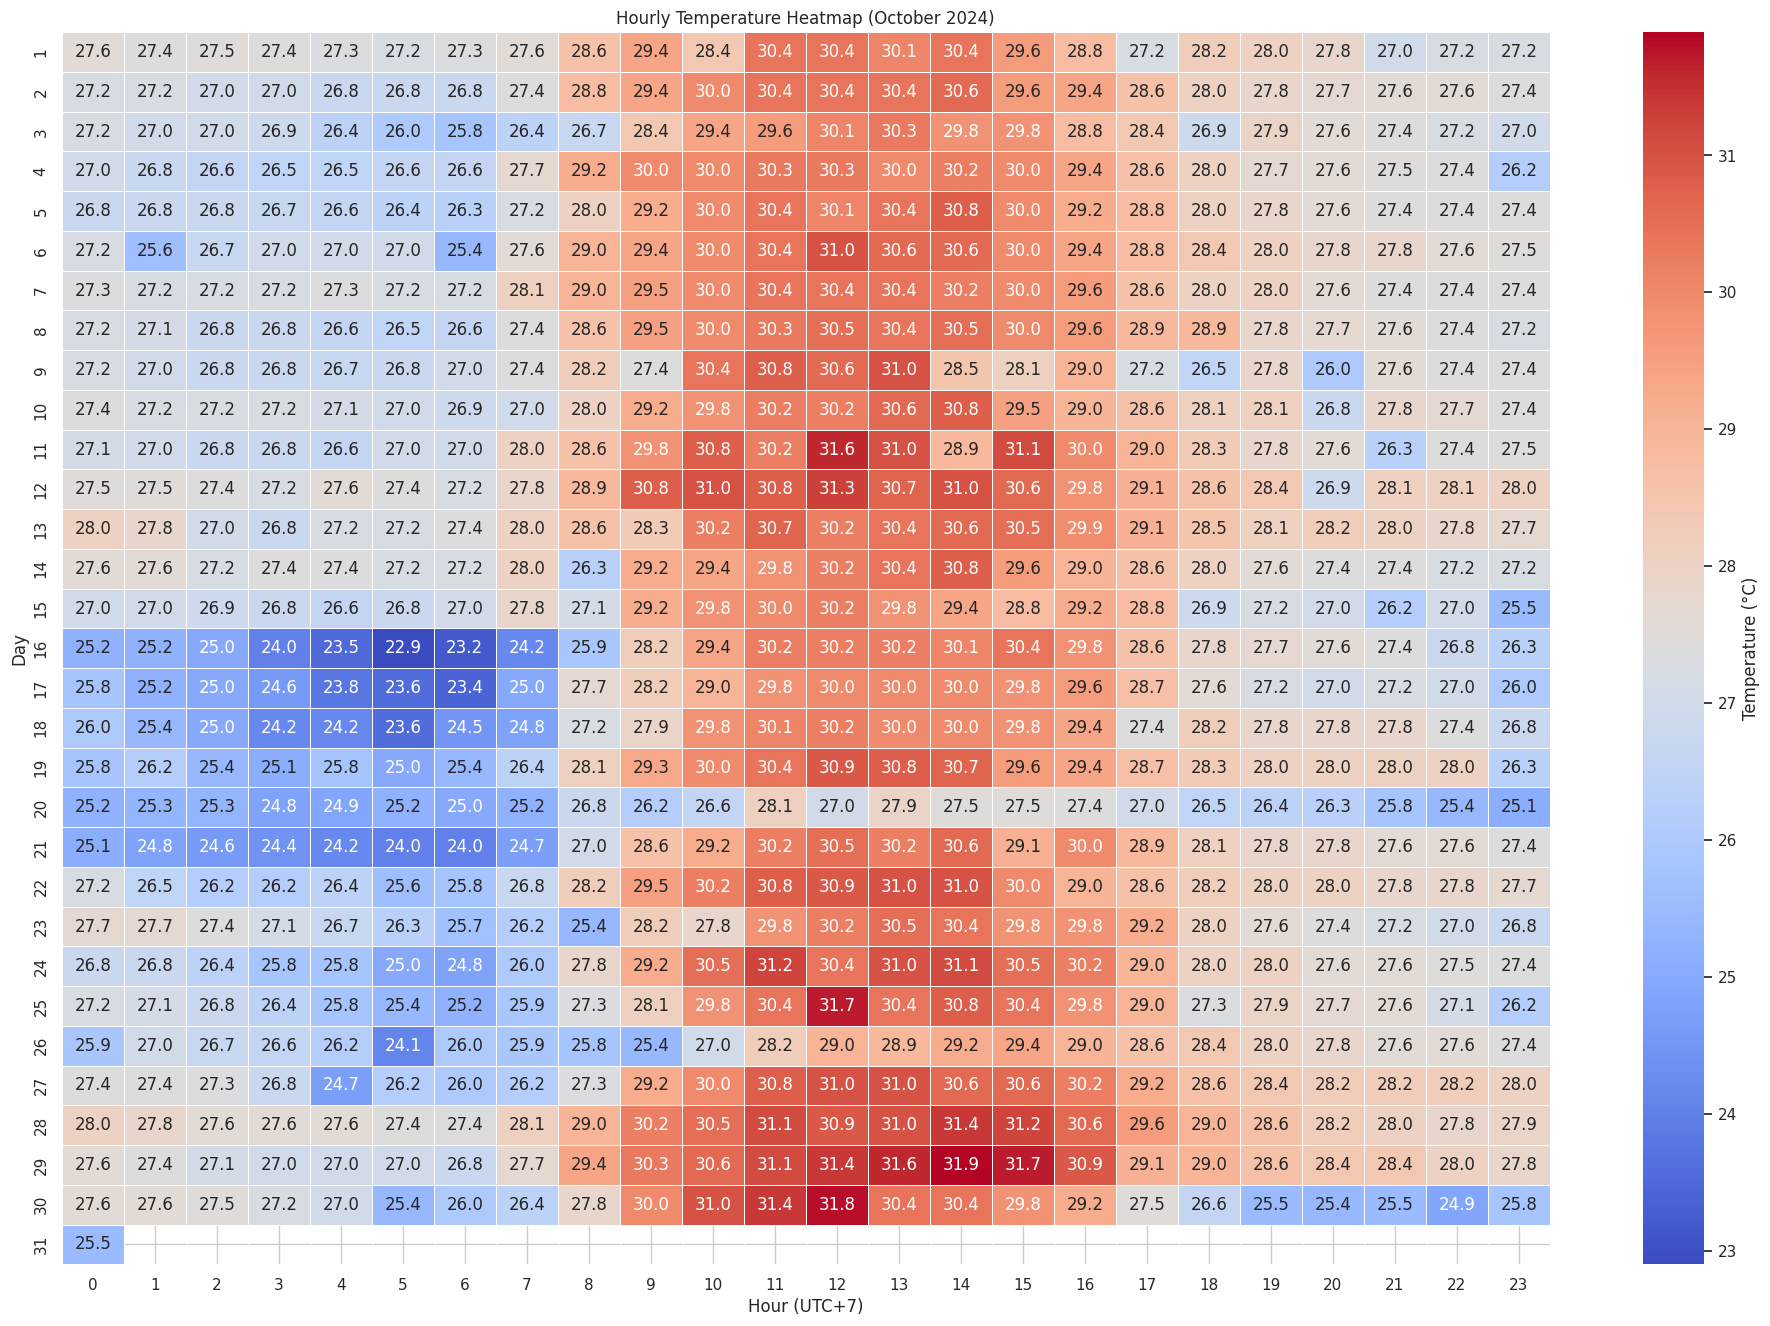

In [13]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

# Set time period for a single month, e.g., October 2024
start = datetime(2024, 10, 1)
end = datetime(2024, 10, 31)

# Get hourly data and calculate daily average temperature for the specified month
data = Hourly(96805, start, end, "Asia/Jakarta").fetch()
data['date'] = data.index.date  # Konversi indeks ke tanggal untuk pengelompokan harian
data['day'] = data.index.day
data['hour'] = data.index.hour

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
temperature_pivot = data.pivot_table(index='day', columns='hour', values='temp')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="coolwarm",
            cbar_kws={'label': 'Temperature (°C)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Temperature Heatmap (October 2024)')

# Menampilkan heatmap
plt.savefig("Temp_month_Meteostat.jpg")
plt.show()


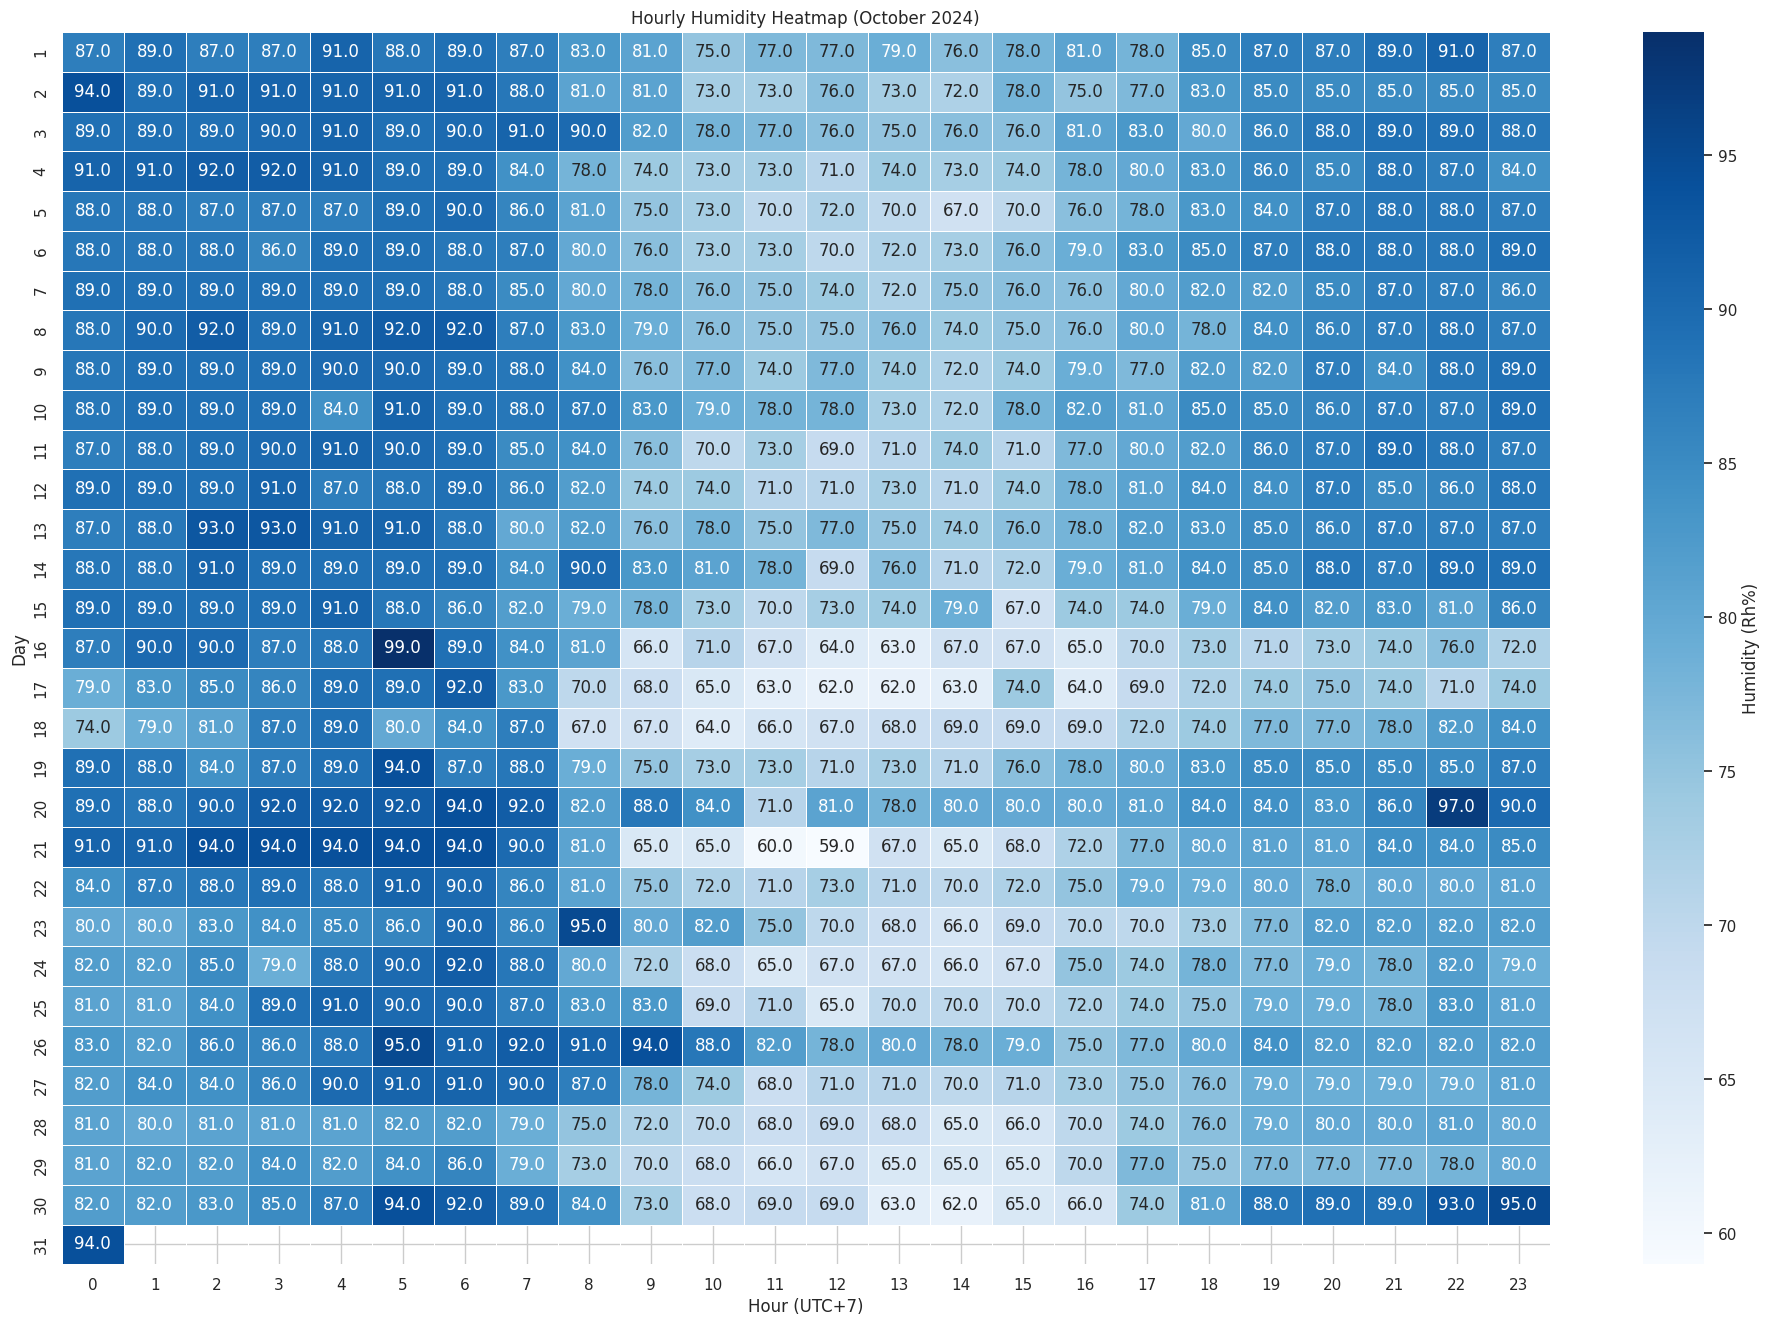

In [14]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
humidity_pivot = data.pivot_table(index='day', columns='hour', values='rhum')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="Blues",
            cbar_kws={'label': 'Humidity (Rh%)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Humidity Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

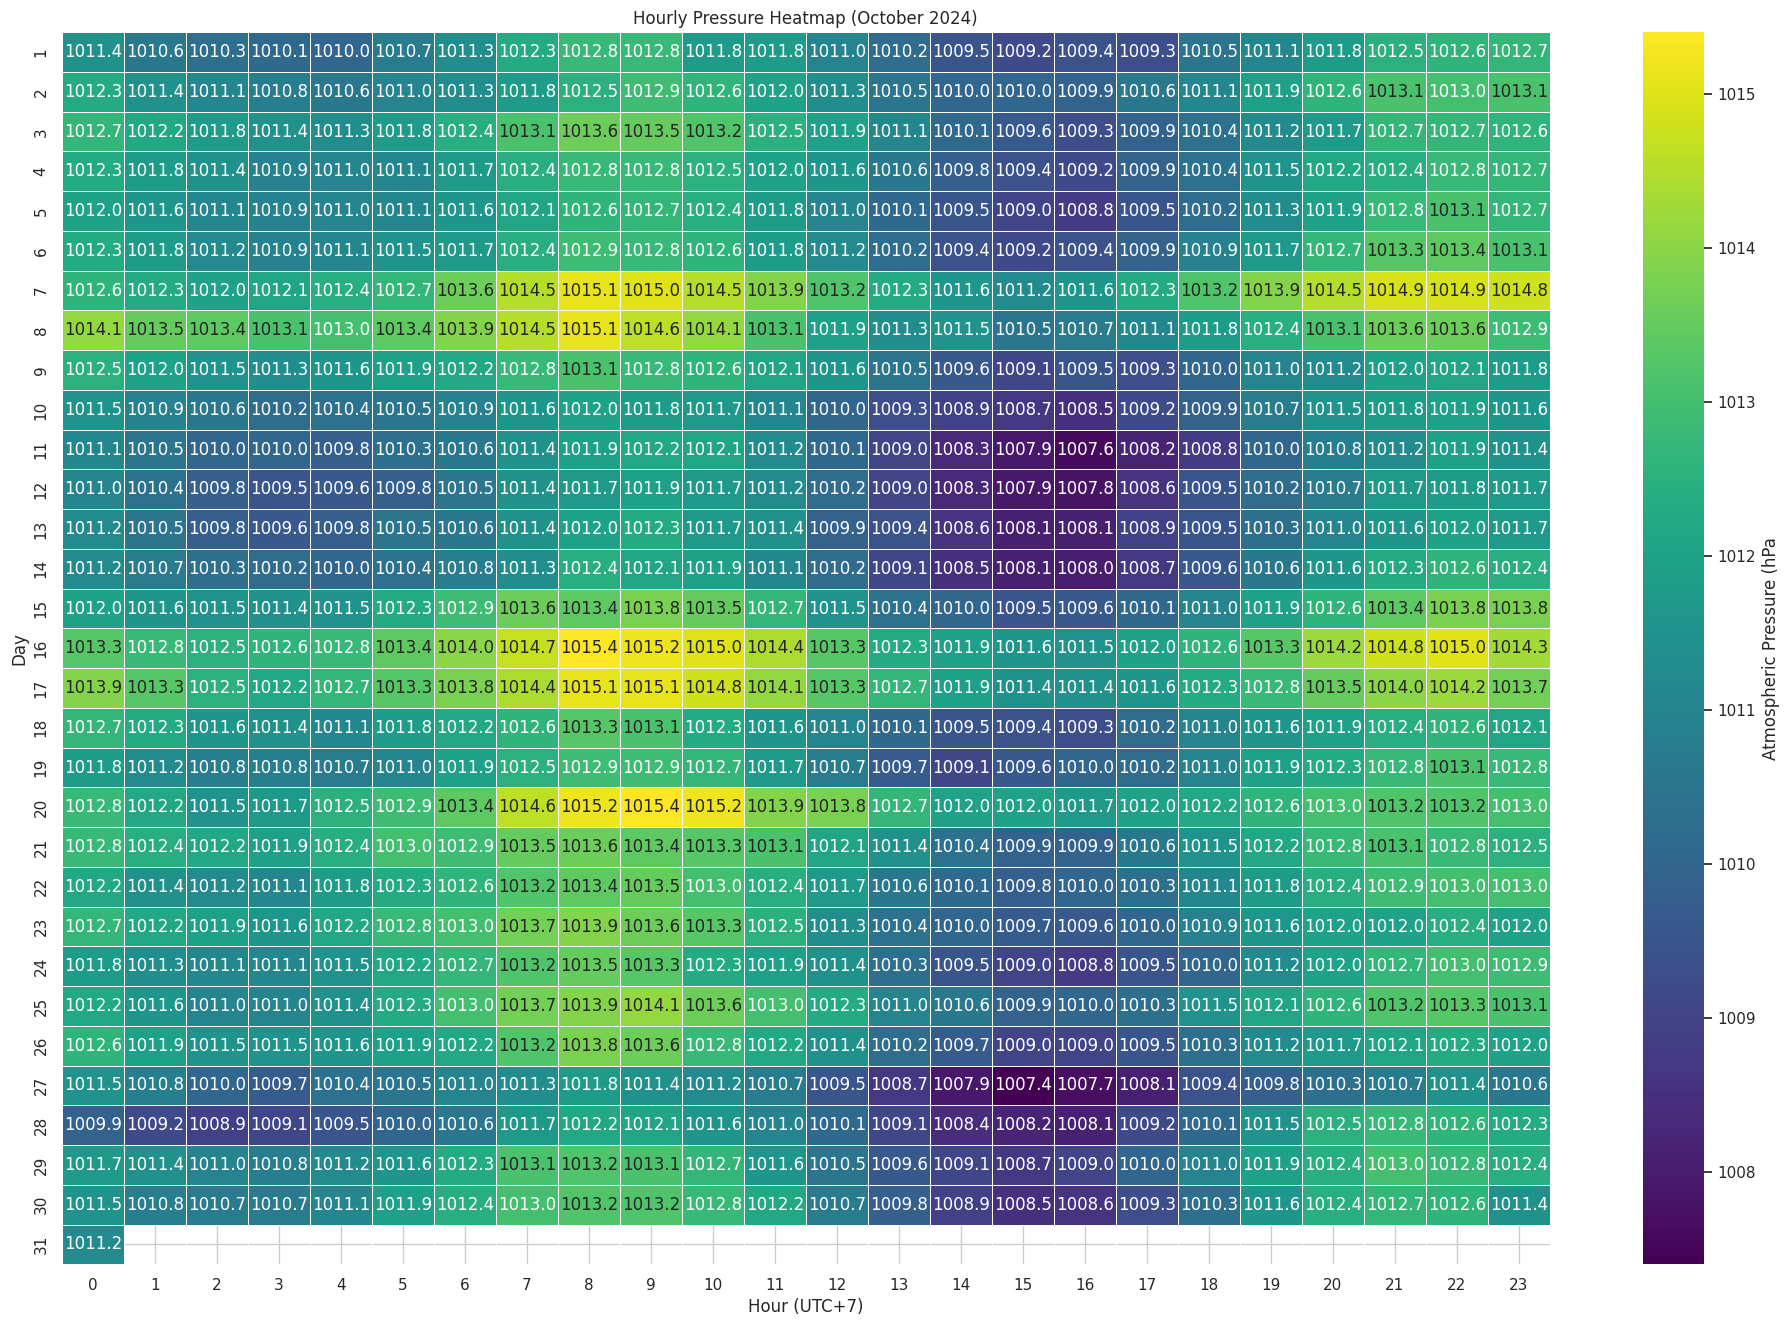

In [15]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
press_pivot = data.pivot_table(index='day', columns='hour', values='pres')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(press_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="viridis",
            cbar_kws={'label': 'Atmospheric Pressure (hPa'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Pressure Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

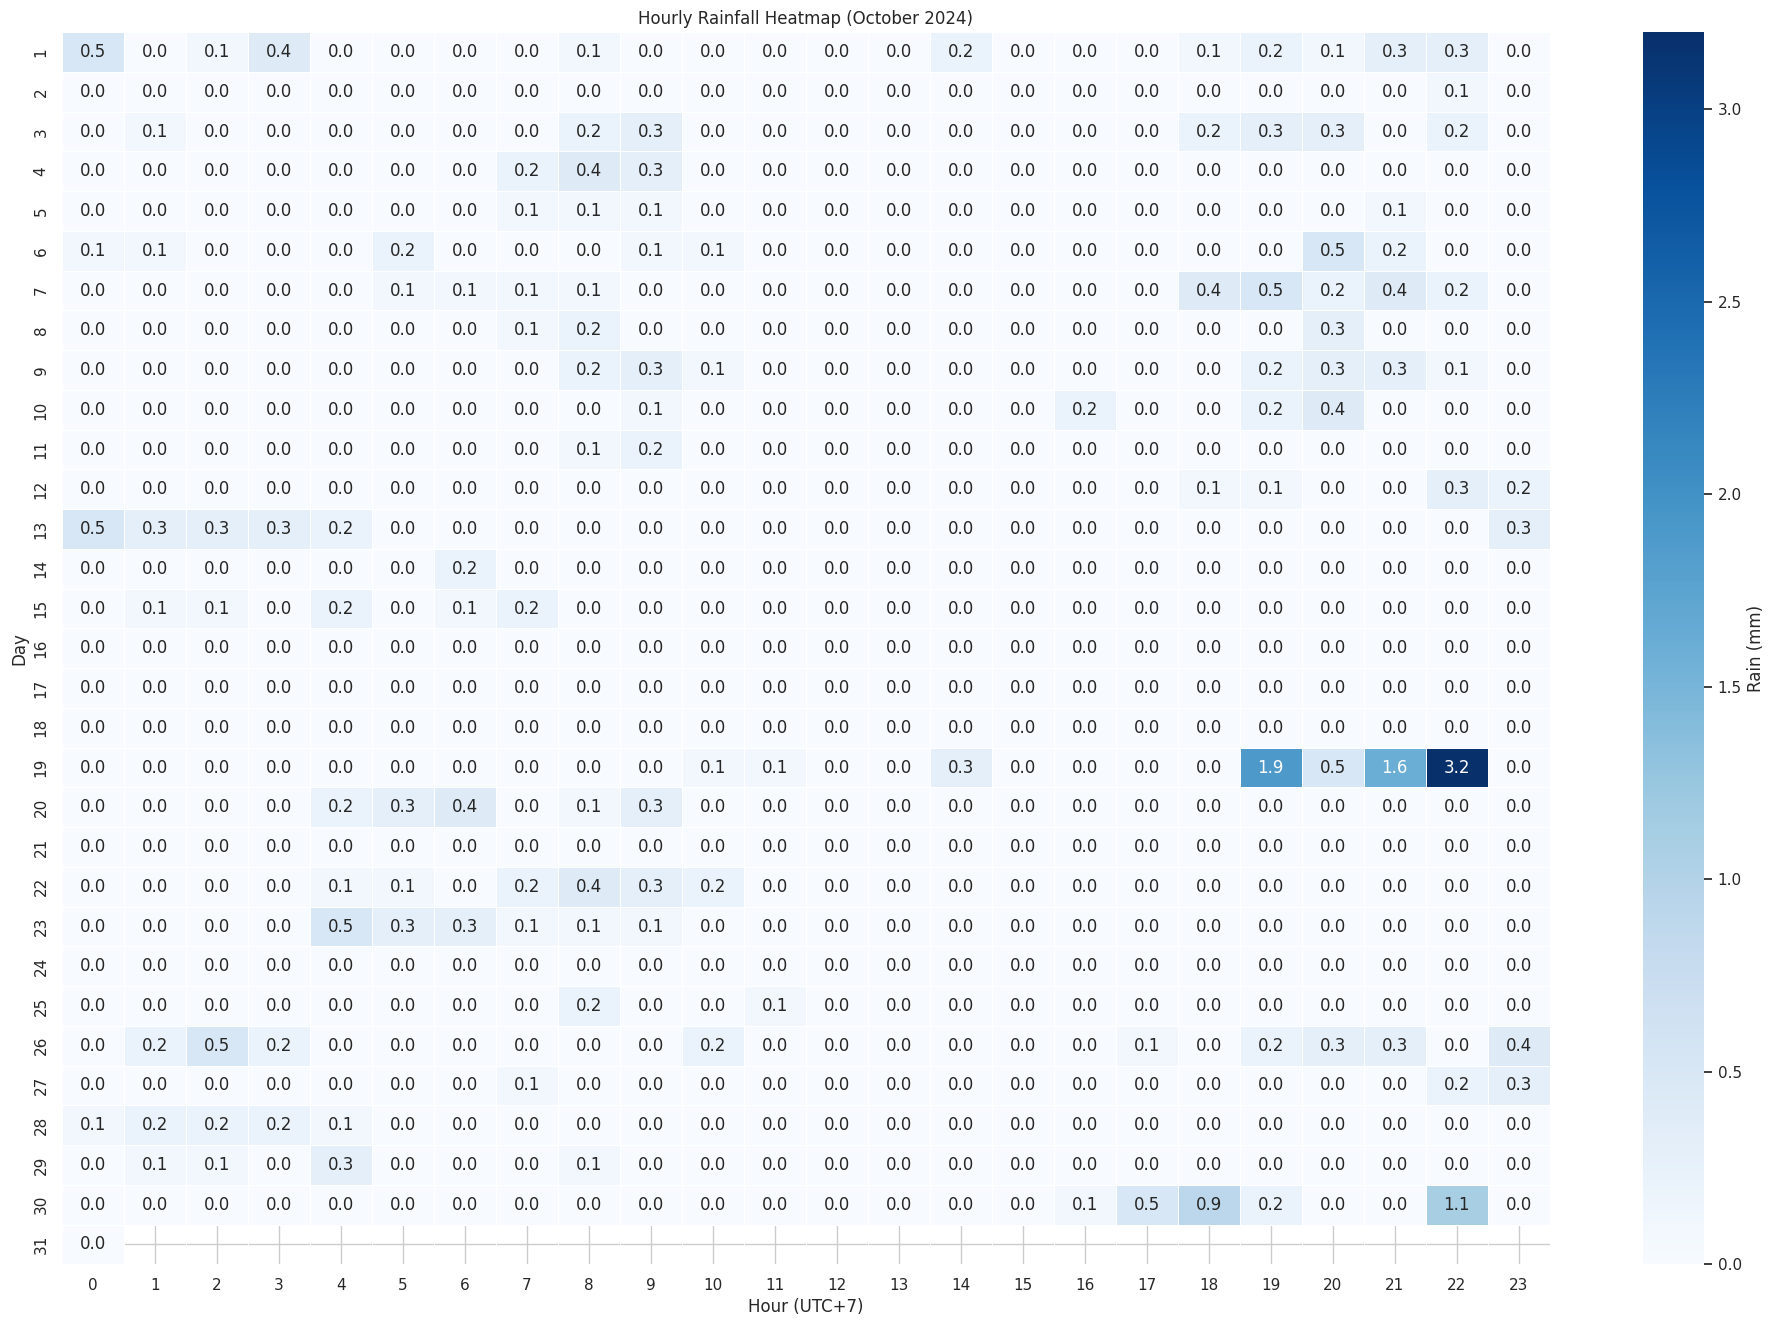

In [16]:

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
rain_pivot = data.pivot_table(index='day', columns='hour', values='prcp')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rain_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="Blues",
            cbar_kws={'label': 'Rain (mm)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Rainfall Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()

In [17]:
data.tail(20)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,date,day,hour
time,,,,,,,,,,,,,,
2024-10-30 05:00:00+07:00,25.4,24.4,94.0,0.0,NaN,89.0,12.6,NaN,1011.9,NaN,2.0,2024-10-30,30,5
2024-10-30 06:00:00+07:00,26.0,24.6,92.0,0.0,NaN,270.0,5.4,NaN,1012.4,NaN,1.0,2024-10-30,30,6
2024-10-30 07:00:00+07:00,26.4,24.4,89.0,0.0,NaN,300.0,9.4,NaN,1013.0,NaN,2.0,2024-10-30,30,7
2024-10-30 08:00:00+07:00,27.8,24.8,84.0,0.0,NaN,250.0,5.4,NaN,1013.2,NaN,2.0,2024-10-30,30,8
2024-10-30 09:00:00+07:00,30.0,24.6,73.0,0.0,NaN,140.0,7.6,NaN,1013.2,NaN,2.0,2024-10-30,30,9
2024-10-30 10:00:00+07:00,31.0,24.4,68.0,0.0,NaN,130.0,7.6,NaN,1012.8,NaN,3.0,2024-10-30,30,10
2024-10-30 11:00:00+07:00,31.4,25.0,69.0,0.0,NaN,150.0,11.2,NaN,1012.2,NaN,3.0,2024-10-30,30,11
2024-10-30 12:00:00+07:00,31.8,25.4,69.0,0.0,NaN,120.0,9.4,NaN,1010.7,NaN,3.0,2024-10-30,30,12
2024-10-30 13:00:00+07:00,30.4,22.6,63.0,0.0,NaN,162.0,21.2,NaN,1009.8,NaN,3.0,2024-10-30,30,13


In [11]:
print("Finish")

Finish


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>